In [2]:
from sklearn.datasets import load_files

reviews_train = load_files('aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
reviews_test = load_files('aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(text_train)

In [6]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)

In [7]:
lda.components_.shape

(10, 1000)

In [8]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [9]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
re            book          music         us            gets          
thing         war           version       director      killer        
worst         read          musical       work          horror        
nothing       horror        song          real          woman         
look          american      wonderful     world         police        
didn          zombie        songs         without       house         
actually      japanese      mr            audience      girl          
going         black         beautiful     may           goes          
want          years         dance         point         guy           
guy           zombies       animation     between       down          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
fami

In [10]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

In [11]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
fight         team          performance   family        revenge       awful         comedy        
ben           match         amazing       child         third         budget        audience      
super         title         role          parents       action        low           each          
hero          last          fantastic     home          fun           worst         romantic      
gun           hand          performances  boy           though        worse         moments       
fighting      night         actor         problems      certain       lame          between       
evil          against       play          same          lots          band          drama         
action        won           actors        gets          three         avoid         both          
kill      

In [12]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'No, not really, but this is a very good film indeed, and is sadly a forgotten gem. Black and white suits the film.\n'
b'Jack Frost is about a serial killer who is sentenced to death. On the Way to his death sentence the prison truck that he rides in collides with a chemical tanker filled with a chemical that turns his molecules with the snow on the ground turning him into a snowman.\n'
b"This movie was just as good as some of the other westerns made by Anthony Mann and James Stewart like Winchester '73 and The Naked Spur, and much better than Thunder Bay and Bend Of The River. This film starts out like a run of the mill western but gets more complex as it goes along.\n"
b"I am one of Jehovah's Witnesses and I also work in an acute care medical facility. Over the years I have seen people die from hemolytic reactions to blood transfusions, have attended numerous conferences on blood born pathogens, and have seen several patients become seriously ill from pathogens induced by transfused

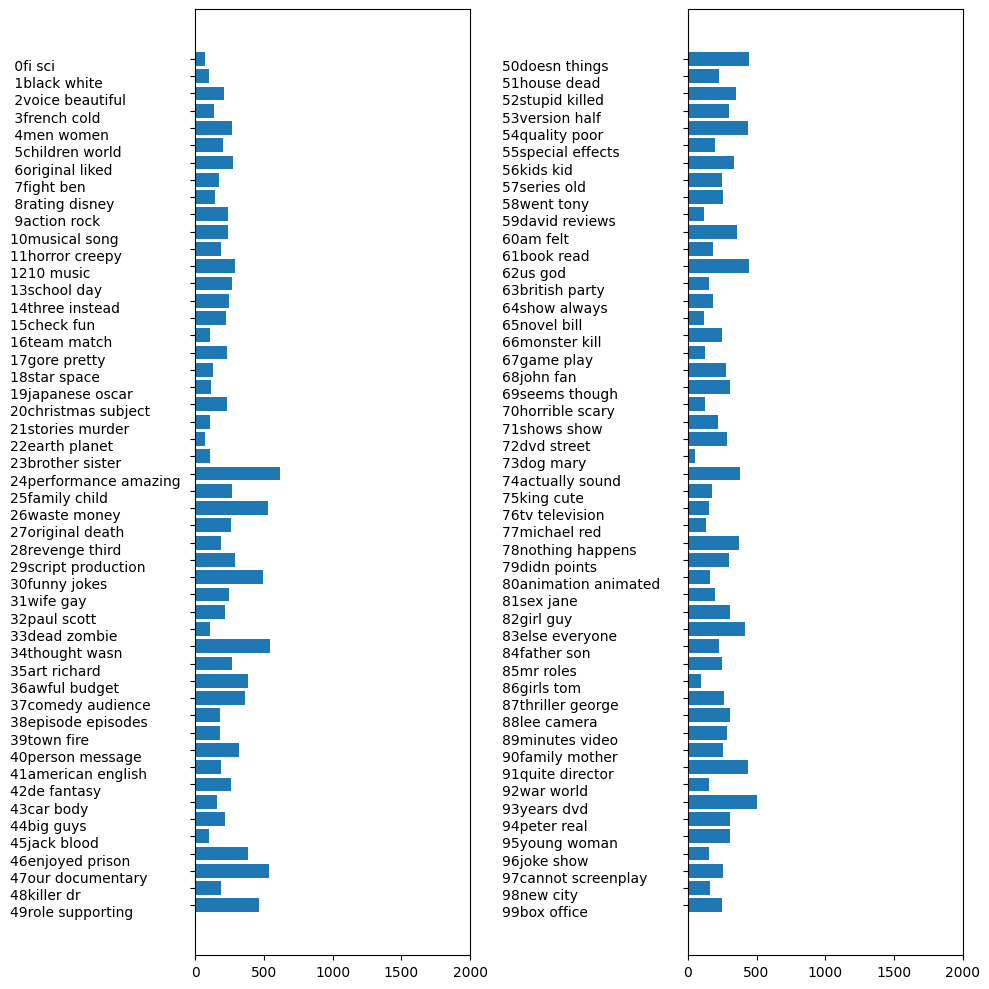

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()